In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
model = sm.GLM.from_formula("target ~ age", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -200.93
Date:                Thu, 09 Sep 2021   Deviance:                       401.86
Time:                        10:21:59   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.014     -3.841      0.000      -0.079      -0.026
==============================================================================
"""

In [5]:
df["Sex1"] = df.sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.target)
c = c.apply(lambda x: x/x.sum(), axis=1)
c

target,0,1
Sex1,,
Female,0.250000,0.750000
Male,0.550725,0.449275


In [6]:
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c['logodds'] = np.log(c.odds)
c.odds.Male / c.odds.Female
c

target,0,1,odds,logodds
Sex1,,,,
Female,0.250000,0.750000,3.000000,1.098612
Male,0.550725,0.449275,0.815789,-0.203599


In [7]:
model = sm.GLM.from_formula("target ~ Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.40
Date:                Thu, 09 Sep 2021   Deviance:                       392.80
Time:                        10:21:59   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0986      0.236      4.661      0.000       0.637       1.561
Sex1[T.Male]    -1.3022      0.274     -4.752      0.000      -1.839      -0.765
================================================================================
"""

In [8]:
log_reg_coef = c.logodds.Male - c.logodds.Female
log_reg_coef

-1.3022112439093494

In [9]:
df["Sex1"] = df.sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.target)
c = c.apply(lambda x: x/x.sum(), axis=1)
model = sm.GLM.from_formula("target ~ age + Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      300
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.29
Date:                Thu, 09 Sep 2021   Deviance:                       370.57
Time:                        10:21:59   Pearson chi2:                     298.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8946      0.900      5.441      0.000       3.131       6.658
Sex1[T.Male]    -1.5375      0.293     -5.249      0.000      -2.112      -0.963
age             -0.0665      0.015     -4.483      0.000      -0.096      -0.037
================================================================================
"""

In [10]:
model = sm.GLM.from_formula("target ~ age + Sex1 + chol", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -183.47
Date:                Thu, 09 Sep 2021   Deviance:                       366.94
Time:                        10:21:59   Pearson chi2:                     295.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.9766      1.094      5.463      0.000       3.832       8.121
Sex1[T.Male]    -1.6684      0.306     -5.443      0.000      -2.269      -1.068
age             -0.0629      0.015     -4.164      0.000      -0.093      -0.033
chol            -0.0048      0.003     -1.882      0.060      -0.010       0.000
================================================================================
"""

In [11]:
df[['age', 'sex', 'chol']].corr()

,age,sex,chol
age,1.000000,-0.098447,0.213678
sex,-0.098447,1.000000,-0.197912
chol,0.213678,-0.197912,1.000000


c:\users\likhi\appdata\local\programs\python\python39\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'cp', 'restecg', 'thal', 'trestbps', 'oldpeak', 'fbs', 'thalach', 'exang', 'slope', 'ca' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
c:\users\likhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Heart Disease')

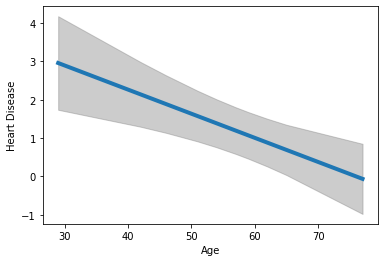

In [12]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"Sex1": "Female", "sex":0, "target": 1, "chol": 250}
pr, cb, fv = predict_functional(result, "age", values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Heart Disease")

c:\users\likhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Heart Disease')

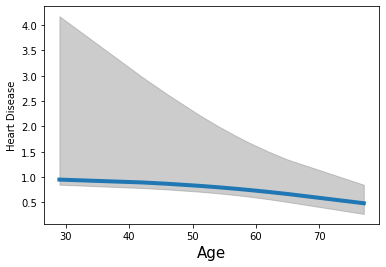

In [13]:
pr1 = 1 / (1 + np.exp(-pr))
cb1 = 1 / (1 + np.exp(-cb))
ax = sns.lineplot(fv, pr1, lw=4)
ax.fill_between(fv, cb1[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Heart Disease")

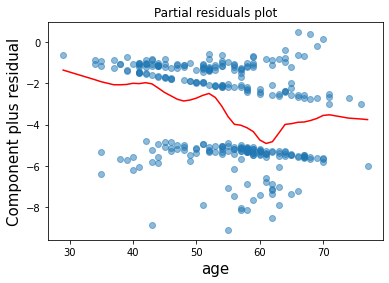

In [14]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.5)
_ = add_lowess(ax)

In [15]:
df['cp'] = df.cp.replace({"typical":1, "asymptomatic": 2, 'nonanginal': 3, 'nontypical':4})
df['thal'] = df.thal.replace({'fixed': 1, 'normal': 2, 'reversable': 3})
df[['age', 'Sex1', 'chol','trestbps', 'fbs', 'restecg', 'slope', 'oldpeak', 'ca', 'exang', 'cp', 'thal']].corr()

,age,chol,trestbps,fbs,restecg,slope,oldpeak,ca,exang,cp,thal
age,1.000000,0.213678,0.279351,0.121308,-0.116211,-0.168814,0.210013,0.276326,0.096801,-0.068653,0.068001
chol,0.213678,1.000000,0.123174,0.013294,-0.151040,-0.004038,0.053952,0.070511,0.067023,-0.076904,0.098803
trestbps,0.279351,0.123174,1.000000,0.177531,-0.114103,-0.121475,0.193216,0.101389,0.067616,0.047608,0.062210
fbs,0.121308,0.013294,0.177531,1.000000,-0.084189,-0.059894,0.005747,0.137979,0.025665,0.094444,-0.032019
restecg,-0.116211,-0.151040,-0.114103,-0.084189,1.000000,0.093045,-0.058770,-0.072042,-0.070733,0.044421,-0.011981
slope,-0.168814,-0.004038,-0.121475,-0.059894,0.093045,1.000000,-0.577537,-0.080155,-0.257748,0.119717,-0.104764
oldpeak,0.210013,0.053952,0.193216,0.005747,-0.058770,-0.577537,1.000000,0.222682,0.288223,-0.149230,0.210244
ca,0.276326,0.070511,0.101389,0.137979,-0.072042,-0.080155,0.222682,1.000000,0.115739,-0.181053,0.151832
exang,0.096801,0.067023,0.067616,0.025665,-0.070733,-0.257748,0.288223,0.115739,1.000000,-0.394280,0.206754
cp,-0.068653,-0.076904,0.047608,0.094444,0.044421,0.119717,-0.149230,-0.181053,-0.394280,1.000000,-0.161736


In [16]:
model = sm.GLM.from_formula("target ~ age + Sex1 + chol + trestbps+ fbs + restecg + slope + oldpeak + ca + exang + cp + thal", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      290
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.32
Date:                Thu, 09 Sep 2021   Deviance:                       216.64
Time:                        10:21:59   Pearson chi2:                     276.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.0873      2.056      3.448      0.001       3.059      11.116
Sex1[T.Male]    -1.6687      0.459     -3.638      0.000      -2.568      -0.770
age             -0.0266      0.021     -1.278      0.201      -0.067       0.014
chol            -0.0032      0.004     -0.869      0.385      -0.010       0.004
trestbps        -0.0159      0.010     -1.561      0.118      -0.036       0.004
fbs              0.0880      0.520      0.169      0.866      -0.932       1.108
restecg          0.4668      0.341      1.370      0.171      -0.201       1.135
slope            0.7184      0.339      2.121      0.034       0.055       1.382
oldpeak         -0.5988      0.212     -2.827      0.005      -1.014      -0.184
ca              -0.8013      0.189     -4.238      0.000      -1.172      -0.431
exang           -1.1630      0.394     -2.952      0.003      -1.935      -0.391
cp               0.9232      0.184      5.022      0.000       0.563       1.283
thal            -0.8795      0.283     -3.103      0.002      -1.435      -0.324
================================================================================
"""

In [17]:
X = df[['age', 'Sex1', 'chol','trestbps', 'fbs', 'restecg', 'slope', 'oldpeak', 'ca', 'exang', 'cp', 'thal']]
predicted_output = result.predict(X)
for i in range(0, len(predicted_output)):
    predicted_output = predicted_output.replace()
    if predicted_output[i] >= 0.5:
        predicted_output = predicted_output.replace(predicted_output[i], 1)
    else:
        predicted_output = predicted_output.replace(predicted_output[i], 0)
accuracy = 0
for i in range(0, len(predicted_output)):
    if df['target'][i] == predicted_output[i]:
        accuracy += 1
print("Accuracy = ", accuracy/len(df))

Accuracy =  0.8547854785478548
